# Importando as bibiliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importando os dados e overview

In [2]:
df = pd.read_csv('ds_salaries.csv')

In [3]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [4]:
df.shape

(3755, 11)

# Primeira análise sobre os dados

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [6]:
df.nunique()

work_year                4
experience_level         4
employment_type          4
job_title               93
salary                 815
salary_currency         20
salary_in_usd         1035
employee_residence      78
remote_ratio             3
company_location        72
company_size             3
dtype: int64

In [7]:
df.work_year.value_counts()

2023    1785
2022    1664
2021     230
2020      76
Name: work_year, dtype: int64

In [8]:
df.experience_level.value_counts()

SE    2516
MI     805
EN     320
EX     114
Name: experience_level, dtype: int64

In [9]:
df.employment_type.value_counts()

FT    3718
PT      17
CT      10
FL      10
Name: employment_type, dtype: int64

In [10]:
df.job_title.value_counts()

Data Engineer                          1040
Data Scientist                          840
Data Analyst                            612
Machine Learning Engineer               289
Analytics Engineer                      103
                                       ... 
Principal Machine Learning Engineer       1
Azure Data Engineer                       1
Manager Data Management                   1
Marketing Data Engineer                   1
Finance Data Analyst                      1
Name: job_title, Length: 93, dtype: int64

In [11]:
np.round(df.salary.describe())

count        3755.0
mean       190696.0
std        671677.0
min          6000.0
25%        100000.0
50%        138000.0
75%        180000.0
max      30400000.0
Name: salary, dtype: float64

In [12]:
df.salary_currency.value_counts()

USD    3224
EUR     236
GBP     161
INR      60
CAD      25
AUD       9
SGD       6
BRL       6
PLN       5
CHF       4
HUF       3
DKK       3
JPY       3
TRY       3
THB       2
ILS       1
HKD       1
CZK       1
MXN       1
CLP       1
Name: salary_currency, dtype: int64

In [13]:
np.round(df.salary_in_usd.describe())

count      3755.0
mean     137570.0
std       63056.0
min        5132.0
25%       95000.0
50%      135000.0
75%      175000.0
max      450000.0
Name: salary_in_usd, dtype: float64

In [14]:
df.employee_residence.value_counts()

US    3004
GB     167
CA      85
ES      80
IN      71
      ... 
BA       1
AM       1
CY       1
KW       1
MT       1
Name: employee_residence, Length: 78, dtype: int64

In [15]:
df.remote_ratio	.value_counts()

0      1923
100    1643
50      189
Name: remote_ratio, dtype: int64

In [16]:
df.company_location.value_counts()

US    3040
GB     172
CA      87
ES      77
IN      58
      ... 
MK       1
BS       1
IR       1
CR       1
MT       1
Name: company_location, Length: 72, dtype: int64

In [17]:
df.company_size.value_counts()

M    3153
L     454
S     148
Name: company_size, dtype: int64

# Feature Engineering 

In [18]:
# Substituindo siglas do nível de experiência
df['experience_level'] = df['experience_level'].replace({'SE':'Senior', 'MI':'Mid-level', 'EN':'Entry-level','EX':'Executive-level'})

# Substituindo siglas do tipo de contrato
df['employment_type'] = df['employment_type'].replace({'FT':'Full-time', 'CT':'Contractual','PT':'Part-time', 'FL':'Freelancer'})

# Substituindo por remoto, presencial oi hibrido
df['remote_ratio'] = df['remote_ratio'].replace({100: 'Remote', 0:'On-site', 50:'Hybrid'})

# Vizualização 

### Vamos visualizar, primeiramente, a distribuiçao dos registros por ano

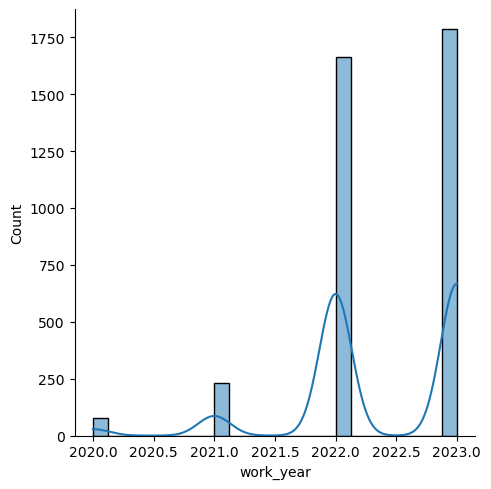

In [45]:
sns.displot(data=df, x="work_year", kde=True)
plt.show()

Nosso conjunto de dados representa marjoritariamente salários de 2023 e 2022

### Agora, a distribuição dos salários em relação ao tamanho da empresa

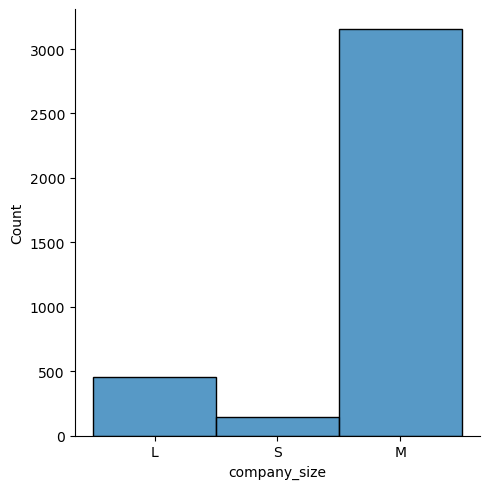

In [46]:
sns.displot(data=df, kind="hist", x="company_size")

Estamos lidando com muitos mais registros de médias empresas

### Distribuição dos níveis de experiênica constados no dataset

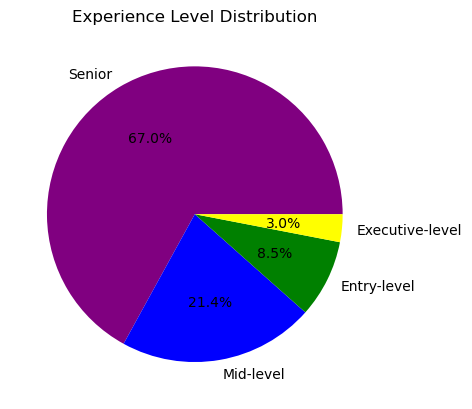

In [53]:
level_counts = df['experience_level'].value_counts()
colors = ["purple", "blue", "green", "yellow"]
plt.pie(level_counts.values, labels=level_counts.index, autopct='%1.1f%%', colors=colors)
plt.title('Experience Level Distribution')
plt.show()

70% dos nossos registrados são de empregados com alto nível de experiência

### Top 10 dos títulos de profissional de dados que mais aparece no registro por ano

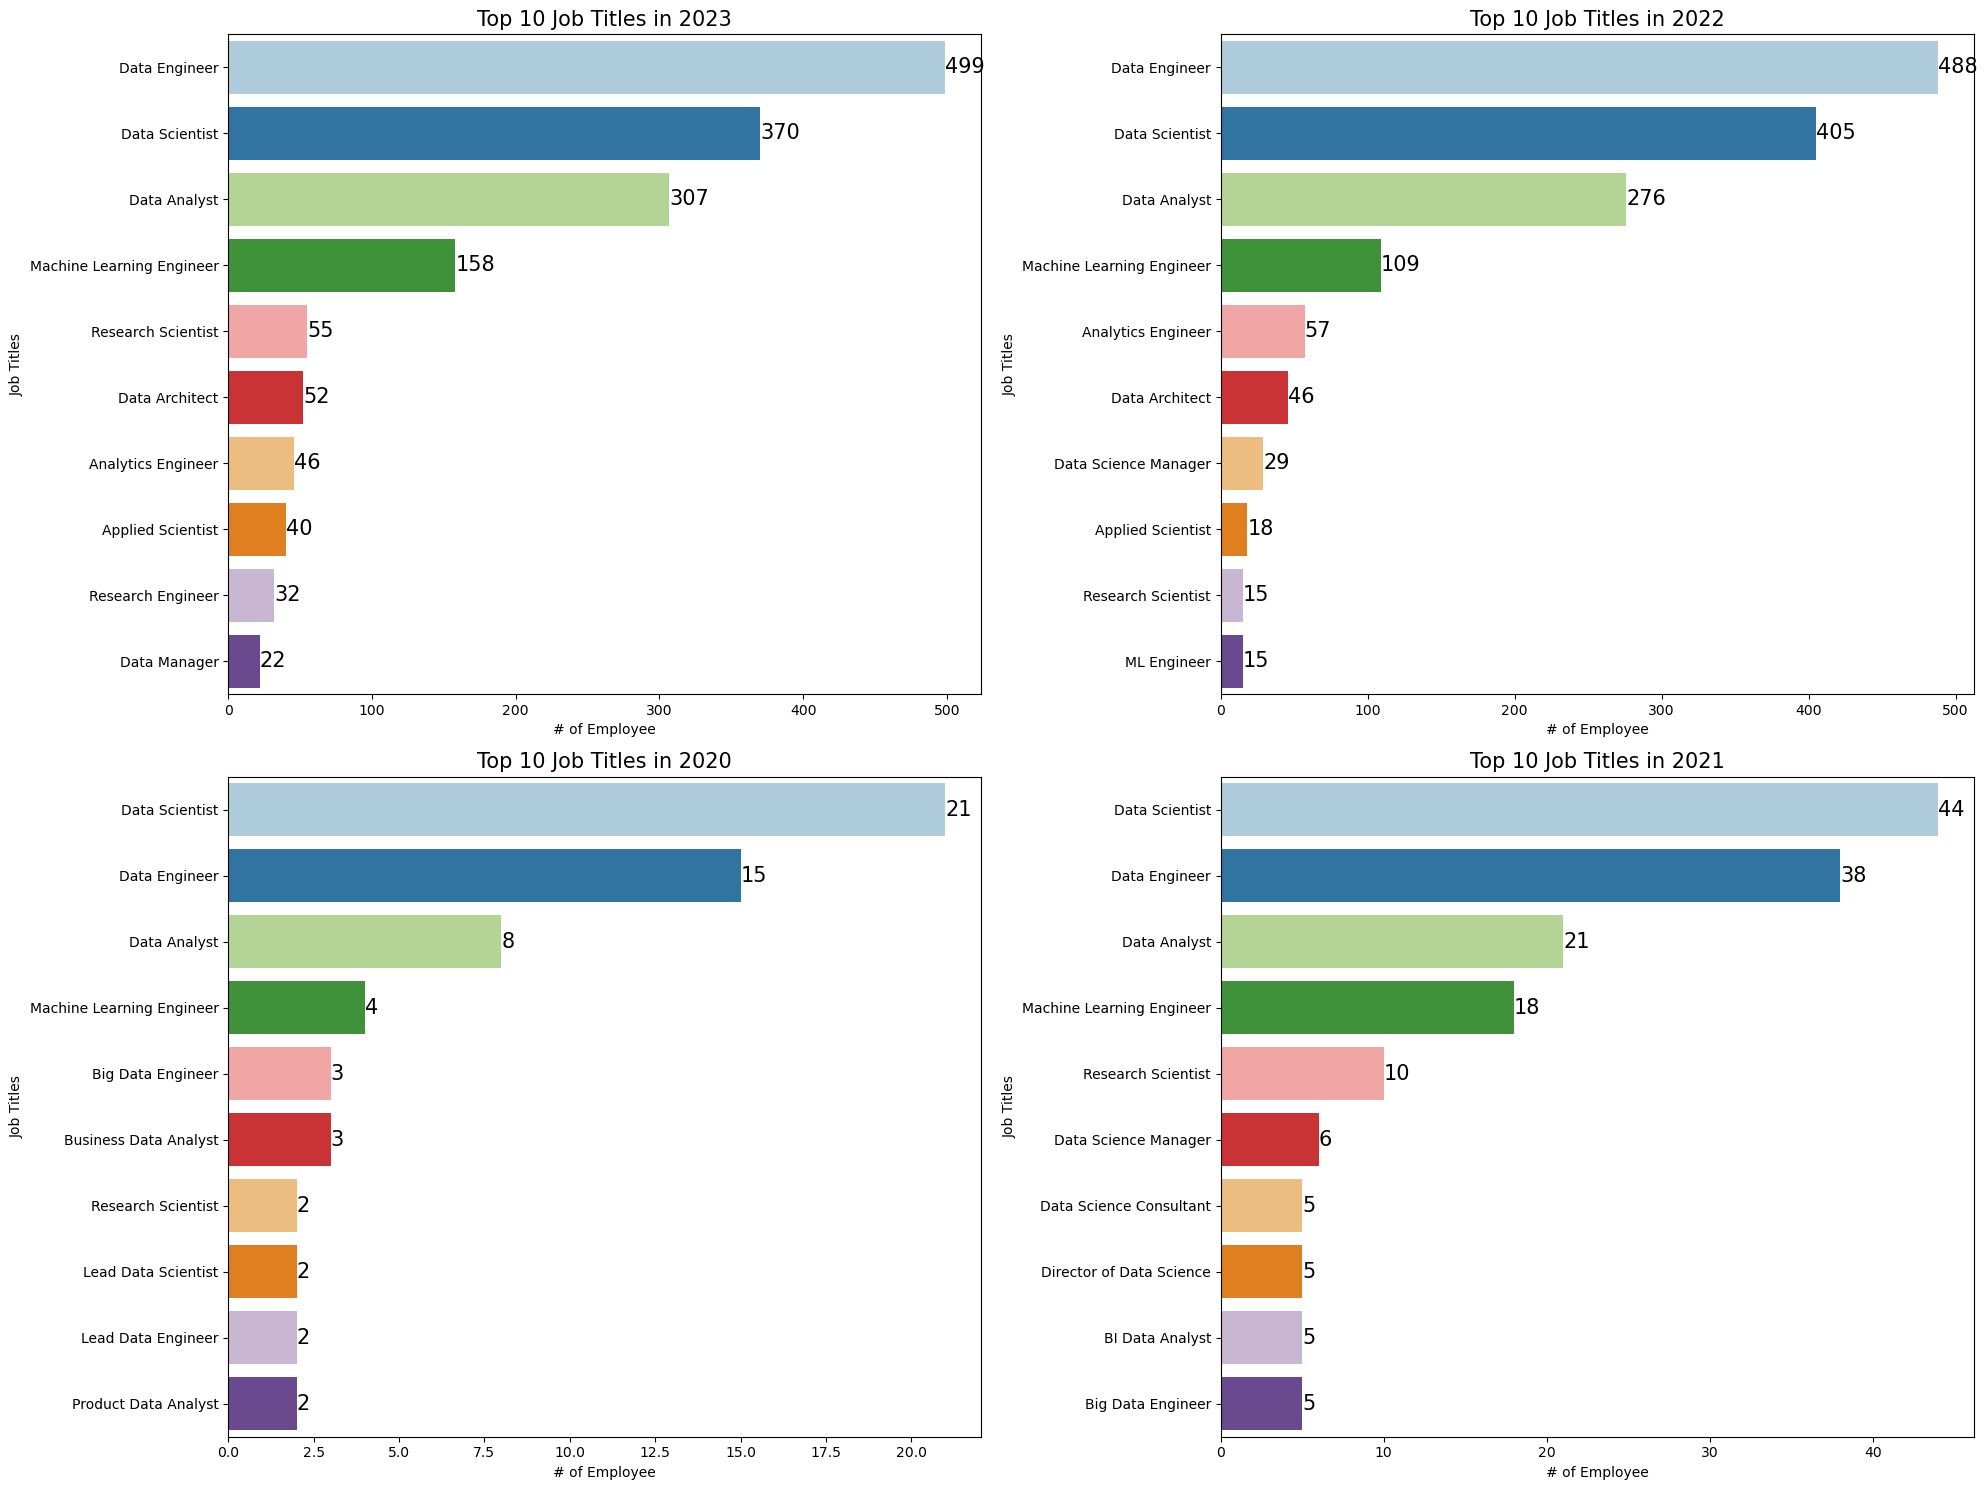

In [54]:
a = 2
b = 2
fig, axs = plt.subplots(a, b, figsize=(20, 15))

for i, year in enumerate(df['work_year'].unique()):
    dft = df.loc[df['work_year'] == year, 'job_title'].value_counts().nlargest(10).reset_index()

    ax = axs[i // b, i % b] if a > 1 else axs[i % b]

    sns.barplot(data=dft, y='index', x='job_title', palette="Paired", ax=ax)
    ax.set_ylabel('Job Titles')
    ax.set_xlabel('# of Employee')
    ax.set_title(f'Top 10 Job Titles in {year}', size=15)
    ax.bar_label(ax.containers[0], size=15)

plt.tight_layout()
plt.show()


Enquanto em 2020 e 2021 o título mais comum foi de Data Scientist, em 2022 e 23 o mais comum foi Data Engineer

### Vamos visualizar a média salarial dos títulos que recebem os maiores salários

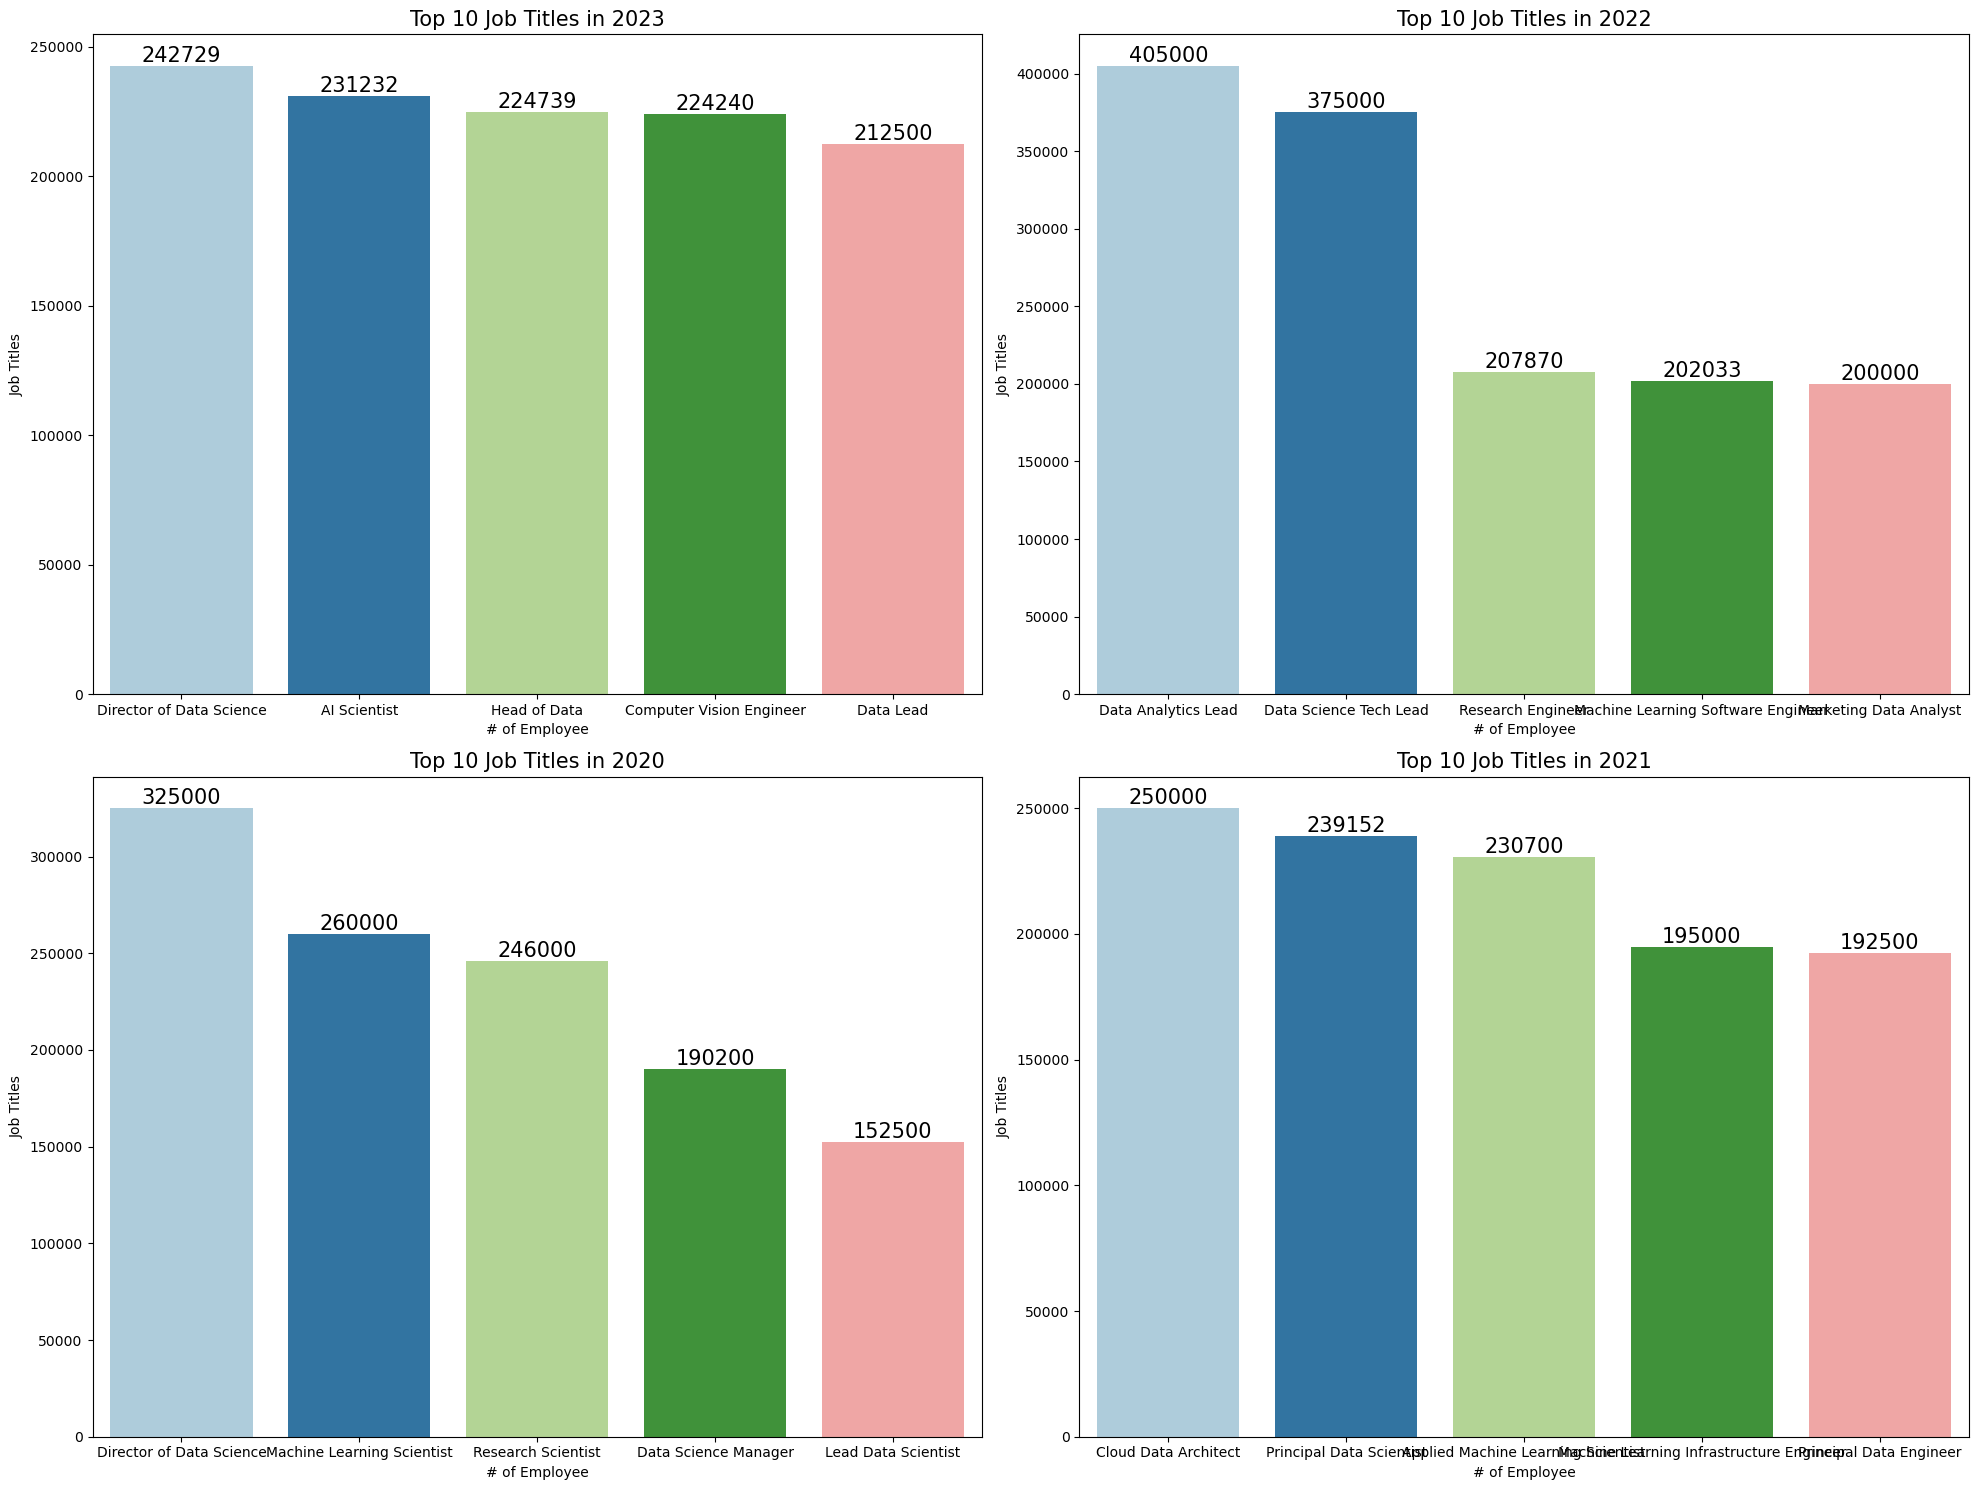

In [35]:
a = 2
b = 2
fig, axs = plt.subplots(a, b, figsize=(20, 15))

for i, year in enumerate(df['work_year'].unique()):
    dft = df.loc[df['work_year'] == year, ['job_title', 'salary_in_usd']].groupby('job_title').agg({'salary_in_usd': 'mean'}).nlargest(5, 'salary_in_usd').reset_index()

    ax = axs[i // b, i % b] if a > 1 else axs[i % b]

    sns.barplot(data=dft, y='salary_in_usd', x='job_title', palette="Paired", ax=ax)
    ax.set_ylabel('Job Titles')
    ax.set_xlabel('# of Employee')
    ax.set_title(f'Top 10 Job Titles in {year}', size=15)
    ax.bar_label(ax.containers[0], size=15)

plt.tight_layout()
plt.show()


Observamos uma significativa variação da média salarial das profissões de chefia e liderança

### Vamos ver a média salarial em dólares, em 2023, do cientista, analista e engenheiro de dados

In [33]:
dft = df.loc[(df['work_year'] == 2023) & (df['job_title'].isin(selected_job_titles)), ['job_title', 'salary_in_usd']].groupby('job_title').agg({'salary_in_usd':'mean'}).reset_index()

dft

,job_title,salary_in_usd
0,Data Analyst,114097.475570
1,Data Engineer,151647.288577
2,Data Scientist,156812.121622


A média salarial do Analista de Dados é quase 30% menor que a do Cientista e Engenheiro de Dados.

### A média salarial em dólares de cada ano do cientista, analista e engenheiro de dados

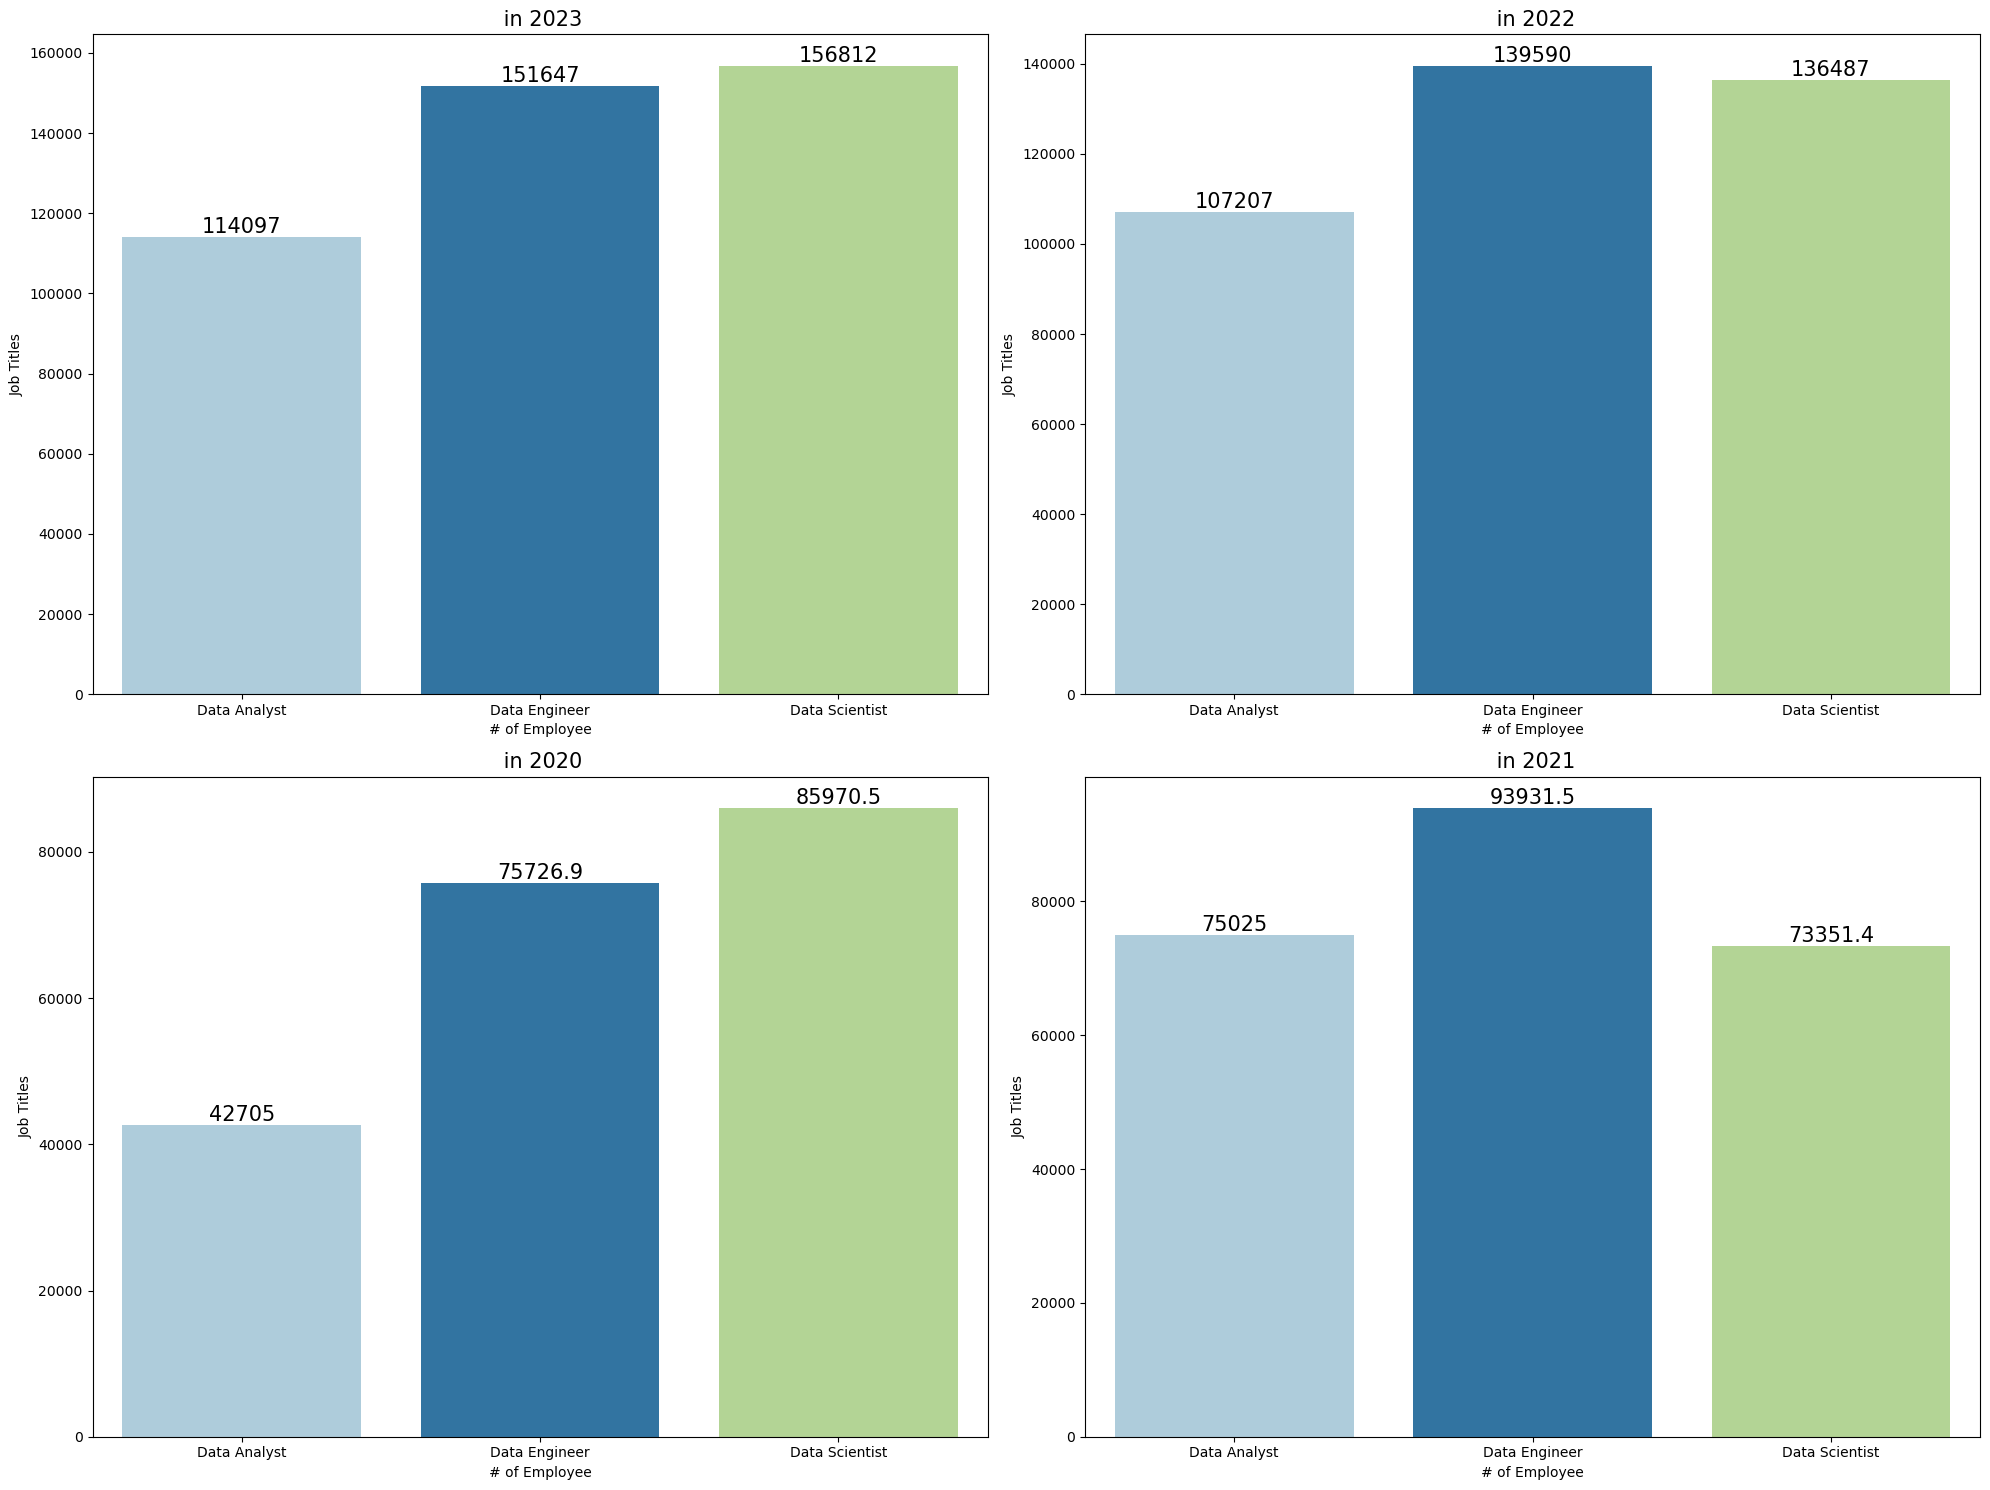

In [57]:
a = 2
b = 2
fig, axs = plt.subplots(a, b, figsize=(20, 15))

for i, year in enumerate(df['work_year'].unique()):
    selected_job_titles = ['Data Scientist', 'Data Analyst', 'Data Engineer']
    dft = df.loc[(df['work_year'] == year) & (df['job_title'].isin(selected_job_titles)), ['job_title', 'salary_in_usd']].groupby('job_title').agg({'salary_in_usd': 'mean'}).reset_index()
    ax = axs[i // b, i % b] if a > 1 else axs[i % b]

    sns.barplot(data=dft, y='salary_in_usd', x='job_title', palette="Paired", ax=ax)
    ax.set_ylabel('Job Titles')
    ax.set_xlabel('# of Employee')
    ax.set_title(f' in {year}', size=15)
    ax.bar_label(ax.containers[0], size=15)

plt.tight_layout()
plt.show()

Houve um crescimento notável nos salários dos profissionais de dados nos últimos 4 anos

### Comparar a média de salário de cada nível de experincia

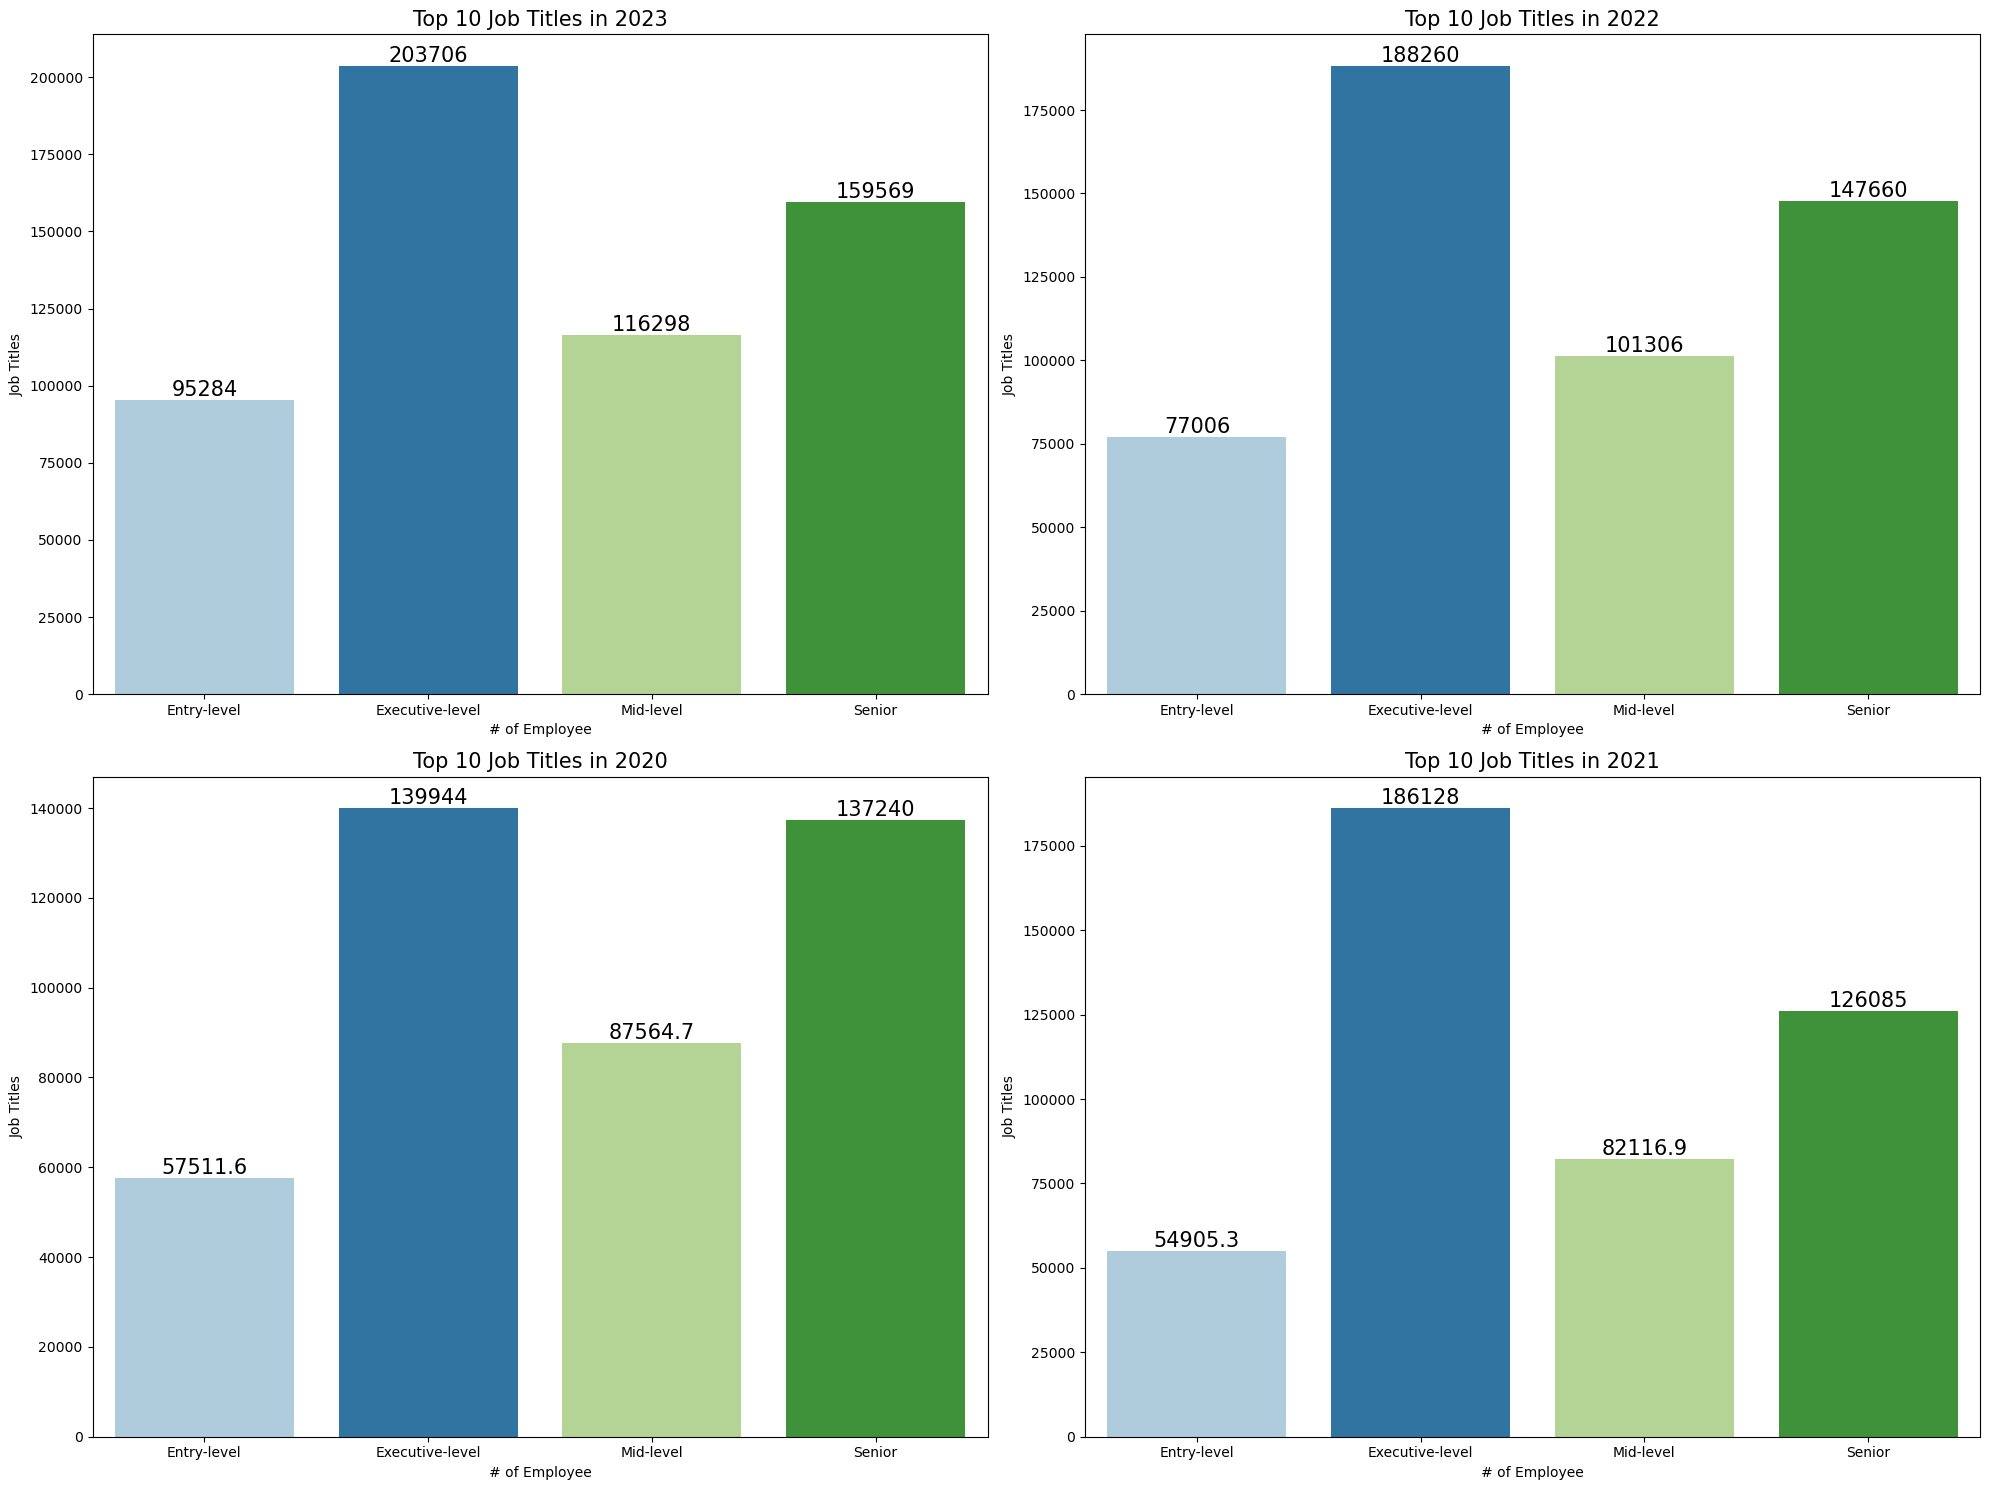

In [34]:
a = 2
b = 2
fig, axs = plt.subplots(a, b, figsize=(20, 15))

for i, year in enumerate(df['work_year'].unique()):
    
    dft = df.loc[df['work_year'] == year, ['experience_level', 'salary_in_usd']].groupby('experience_level').agg({'salary_in_usd': 'mean'}).reset_index()
    ax = axs[i // b, i % b] if a > 1 else axs[i % b]

    sns.barplot(data=dft, y='salary_in_usd', x='experience_level', palette="Paired", ax=ax)
    ax.set_ylabel('Job Titles')
    ax.set_xlabel('# of Employee')
    ax.set_title(f'Top 10 Job Titles in {year}', size=15)
    ax.bar_label(ax.containers[0], size=15)

plt.tight_layout()
plt.show()

Proporcionalmente os salários Entry-level foram os que mais cresceram nos últimos dois anos, mas sabemos que o diminuto número de registros dessa categoria pode influenciar nessa análise.

### Visualizar proporcionalmente o trabalho remoto, presencial e híbrido

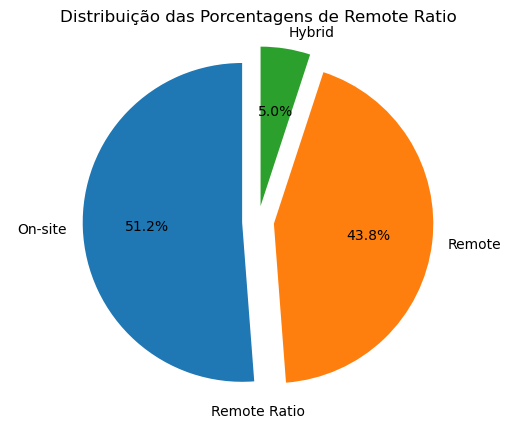

In [40]:
remote_ratio_counts = df['remote_ratio'].value_counts()
labels = remote_ratio_counts.index
sizes = remote_ratio_counts.values
explode = [0.1] * len(labels)  # Para destacar as fatias

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Assegura que o gráfico seja desenhado como um círculo
plt.xlabel('Remote Ratio')
plt.title('Distribuição das Porcentagens de Remote Ratio')

plt.show()

Metade dos trabalhadores tem um emprego presencial

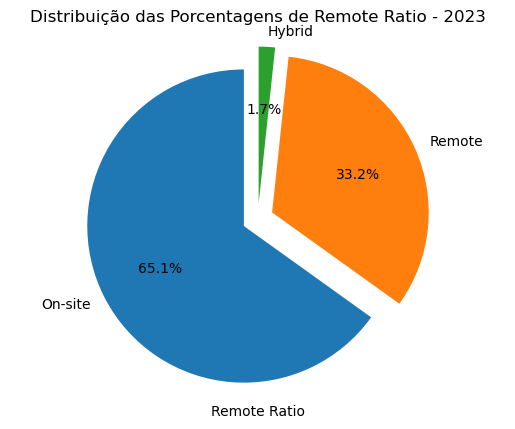

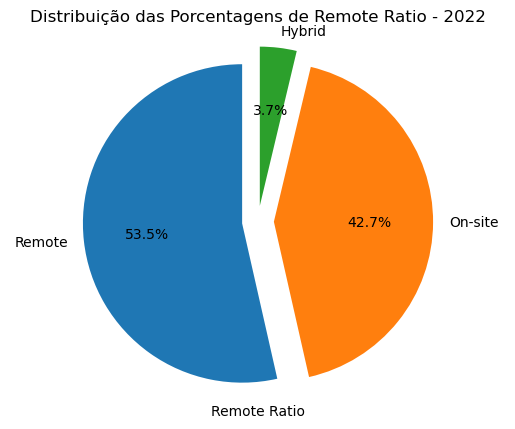

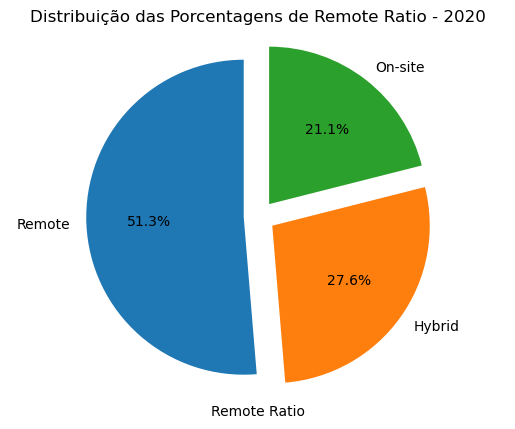

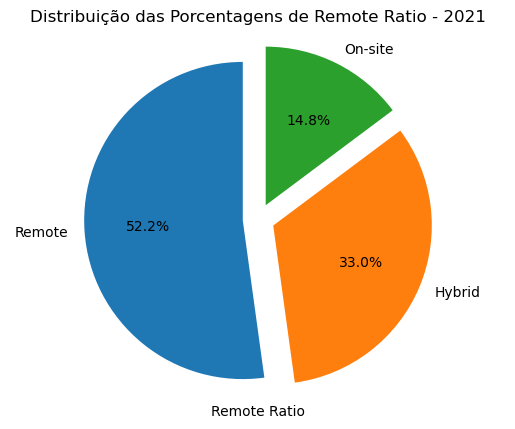

In [59]:
for year in df['work_year'].unique():
    remote_ratio_counts = df[df['work_year'] == year]['remote_ratio'].value_counts()
    labels = remote_ratio_counts.index
    sizes = remote_ratio_counts.values
    explode = [0.1] * len(labels)  # Para destacar as fatias

    plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')  # Assegura que o gráfico seja desenhado como um círculo
    plt.xlabel('Remote Ratio')
    plt.title(f'Distribuição das Porcentagens de Remote Ratio - {year}')

    plt.show()

Podemos ver como o trabalho presencial voltou a ser uma tendência forte em 2023, embora ainda 33% dos trabalhos estejam remoto.